In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("credit_risk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isna().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [4]:
len(df)

614

In [5]:
data=df.dropna()

In [6]:
len(data)

480

# Exploratory Data Analysis

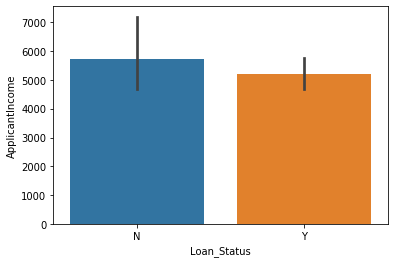

In [7]:
#1: Applicant and coapplicant 
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=data)

In [8]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               54
               Y               85
Semiurban      N               42
               Y              149
Urban          N               52
               Y               98
Name: Loan_Status, dtype: int64

In [9]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Property_Area'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N              0.388489
               Y              0.611511
Semiurban      N              0.219895
               Y              0.780105
Urban          N              0.346667
               Y              0.653333
Name: Loan_Status, dtype: float64

In [10]:
data.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Credit_History'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N              0.900000
                Y              0.100000
1.0             N              0.207317
                Y              0.792683
Name: Loan_Status, dtype: float64

In [11]:
data.Loan_Amount_Term.value_counts()/len(data.Loan_Amount_Term)

360.0    0.856250
180.0    0.075000
480.0    0.025000
300.0    0.018750
84.0     0.006250
120.0    0.006250
36.0     0.004167
240.0    0.004167
60.0     0.004167
Name: Loan_Amount_Term, dtype: float64

In [12]:
data.groupby(['Married','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Married'])['Loan_Status'].count()

Married  Loan_Status
No       N              0.378698
         Y              0.621302
Yes      N              0.270096
         Y              0.729904
Name: Loan_Status, dtype: float64

In [13]:
data.groupby(['Education','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Education'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              0.292428
              Y              0.707572
Not Graduate  N              0.371134
              Y              0.628866
Name: Loan_Status, dtype: float64

In [14]:
output=data[data.CoapplicantIncome==0].groupby(['Married','Loan_Status'])['Loan_Status'].count()\
        /data[data.CoapplicantIncome==0].groupby(['Married'])['Loan_Status'].count()

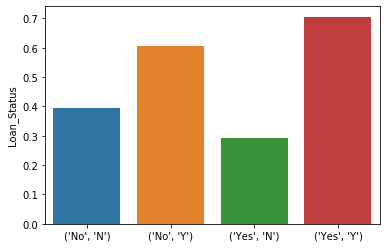

In [15]:
sns.barplot(output.index,output)

In [16]:
data.groupby(['Education','Self_Employed'])['Loan_ID'].count()\
        /data.groupby(['Education'])['Loan_ID'].count()

Education     Self_Employed
Graduate      No               0.861619
              Yes              0.138381
Not Graduate  No               0.865979
              Yes              0.134021
Name: Loan_ID, dtype: float64

In [17]:
data.groupby(['Education','Self_Employed'])['Loan_ID'].count()\


Education     Self_Employed
Graduate      No               330
              Yes               53
Not Graduate  No                84
              Yes               13
Name: Loan_ID, dtype: int64

In [18]:
data[(data.Dependents.isin(["2","3+"]))&(data.Gender=="Male")]\
                .Loan_Amount_Term.mean()

334.90909090909093

In [19]:
data[(data.Dependents.isin(["0","1"]))&(data.Gender=="Male")]\
                .Loan_Amount_Term.mean()

341.31868131868134

In [20]:
data[(data.Dependents.isin(["2","3+"]))&(data.Gender=="Female")]\
                .Loan_Amount_Term.mean()

384.0

In [21]:
data[(data.Dependents.isin(["1","0"]))&(data.Gender=="Female")]\
                .Loan_Amount_Term.mean()

352.5925925925926

In [22]:
data.groupby(['Gender','Married','Property_Area',"Loan_Status"])['Loan_ID'].count()\
        /data.groupby(['Gender','Married','Property_Area'])['Loan_ID'].count()

Gender  Married  Property_Area  Loan_Status
Female  No       Rural          N              0.375000
                                Y              0.625000
                 Semiurban      N              0.413793
                                Y              0.586207
                 Urban          N              0.375000
                                Y              0.625000
        Yes      Rural          N              0.750000
                                Y              0.250000
                 Semiurban      N              0.066667
                                Y              0.933333
                 Urban          N              0.666667
                                Y              0.333333
Male    No       Rural          N              0.405405
                                Y              0.594595
                 Semiurban      N              0.216216
                                Y              0.783784
                 Urban          N              0.500000
    

# Data Prep

In [23]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
data.Credit_History.unique()

array([1., 0.])

In [25]:
X=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].copy()
y=data[ 'Loan_Status'].copy()

In [26]:
def data_cleaning(X):
    X=X.copy()
    X.Gender=X.Gender.map(lambda x:1 if x=='Male' else 0)
    X.Married=X.Married.map(lambda x: 1 if x=="Yes" else 0)
    X.Dependents=X.Dependents.map(lambda x: 3 if x=="3+" else int(x))
    X.Education=X.Education.map(lambda x: 1 if x=="Graduate" else 0)
    X.Self_Employed=X.Self_Employed.map(lambda x: 1 if x=="Yes" else 0)
    X=X.join(pd.get_dummies(X.Property_Area)).drop(["Property_Area"],axis=1)
    return X[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban']]

In [27]:
X_train=data_cleaning(X)

In [28]:
y_train=y.map(lambda x: 1 if x=="Y" else 0)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
for m,col in zip(lr.coef_[0],X_train.columns):
    print(m,"*",col,"+")
print(lr.intercept_[0])

0.1895319923476763 * Gender +
0.3979369153057798 * Married +
0.0532337759221262 * Dependents +
0.31208643672594927 * Education +
-0.12588948456551205 * Self_Employed +
-1.5863537024274261e-06 * ApplicantIncome +
-4.730911938653908e-05 * CoapplicantIncome +
-0.0028901740283690685 * LoanAmount +
-0.004263075254672131 * Loan_Amount_Term +
2.7640229863153793 * Credit_History +
-0.2727527559366654 * Rural +
0.4070273166484802 * Semiurban +
-0.2685865887090895 * Urban +
-0.134312027997271


In [31]:
lr.predict_proba(X_train)[:,1]

array([0.79025871, 0.80290849, 0.72139922, 0.71320537, 0.67431614,
       0.74343477, 0.3137467 , 0.78045884, 0.71236391, 0.83088821,
       0.70392162, 0.70205279, 0.94008294, 0.72290382, 0.13578597,
       0.73449985, 0.1593776 , 0.64410845, 0.24893221, 0.8466427 ,
       0.8741276 , 0.75887639, 0.71351262, 0.75196853, 0.71857664,
       0.87949855, 0.59795666, 0.84826124, 0.61029114, 0.78394177,
       0.74859086, 0.75619972, 0.86961254, 0.83795325, 0.7859281 ,
       0.14914249, 0.78312291, 0.82202329, 0.81189966, 0.81513198,
       0.80811905, 0.10479273, 0.89735744, 0.88548999, 0.7724528 ,
       0.75762672, 0.72383931, 0.7677412 , 0.83128218, 0.20472415,
       0.21555264, 0.80681604, 0.18898894, 0.70274815, 0.91325844,
       0.20590465, 0.74625242, 0.84528018, 0.88285803, 0.85847191,
       0.61867503, 0.64306634, 0.76689185, 0.34041567, 0.81565872,
       0.7444209 , 0.89472499, 0.81564158, 0.88046509, 0.66985083,
       0.84417611, 0.86773568, 0.92090116, 0.76762607, 0.83814

In [32]:
lr.predict(X_train)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
lr.score(X_train,y_train)

0.8125

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,lr.predict(X_train)))

[[ 66  82]
 [  8 324]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.45      0.59       148
           1       0.80      0.98      0.88       332

    accuracy                           0.81       480
   macro avg       0.84      0.71      0.74       480
weighted avg       0.83      0.81      0.79       480



In [36]:
#probability caliberation
y_prob=lr.predict_proba(X_train)[:,1]

In [37]:
y_hat=[]
for i in y_prob:
    if i>0.75:
        y_hat.append(1)
    else:
        y_hat.append(0)
print(confusion_matrix(y_train,y_hat))
print(classification_report(y_train,y_hat))

[[103  45]
 [102 230]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58       148
           1       0.84      0.69      0.76       332

    accuracy                           0.69       480
   macro avg       0.67      0.69      0.67       480
weighted avg       0.73      0.69      0.70       480



In [38]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.

    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.

    labels : array, shape = [n_classes], optional
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If none is given, those that appear at least once
        in ``y_true`` or ``y_pred`` are 

In [39]:
test=df[~df.index.isin(data.index)]

In [40]:
test.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
data.Credit_History.value_counts()/len(data)

1.0    0.854167
0.0    0.145833
Name: Credit_History, dtype: float64

In [42]:
data.Loan_Amount_Term.median()

360.0

In [43]:
def data_imputation(x):
    x=x.copy()
    x.Gender=x.Gender.fillna("Female")
    x.Married=x.Married.fillna("No")
    x.Dependents=x.Dependents.fillna('0')
    x.Self_Employed=x.Self_Employed.fillna("No")
    x.LoanAmount=x.LoanAmount.fillna(128.0)
    x.Loan_Amount_Term=x.Loan_Amount_Term.fillna(360.0)
    x.Credit_History=x.Credit_History.fillna(1.0)
    return x   


In [44]:
X_test=data_cleaning(data_imputation(test))
y_test=test.Loan_Status.map(lambda x:1 if x=="Y" else 0)

In [45]:
y_hat_test=lr.predict(X_test)
print("accuracy",lr.score(X_test,y_test))
print(confusion_matrix(y_test,y_hat_test))
print(classification_report(y_test,y_hat_test))

accuracy 0.7985074626865671
[[20 24]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.87      0.45      0.60        44
           1       0.78      0.97      0.87        90

    accuracy                           0.80       134
   macro avg       0.83      0.71      0.73       134
weighted avg       0.81      0.80      0.78       134



# Entropy

In [46]:
import numpy as np
def entropy(p):
    if (p==0) or (p==1):
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [47]:
entropy(0.5)

1.0

In [48]:
entropy(0.85)

0.6098403047164005

In [49]:
a=np.arange(101)/100
e=[]
for i in a:
    e.append(entropy(i)) 

Text(0, 0.5, 'Entropy')

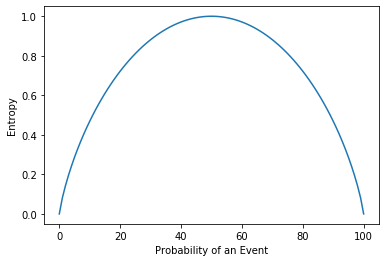

In [50]:
plt.plot(e)
plt.xlabel("Probability of an Event")
plt.ylabel("Entropy")

In [51]:
p=9/14
entropy(p)

0.9402859586706311

In [52]:
sunny=5/14
play_sunny=2/5
entropy(play_sunny)

0.9709505944546686

In [53]:
overcast=4/14
play_ov=4/4
entropy(play_ov)

0

In [54]:
rainy=5/14
play_rainy=3/5
entropy(play_rainy)

0.9709505944546686

In [55]:
entropy(9/14)-(sunny*entropy(play_sunny)+rainy*entropy(play_rainy)+overcast*entropy(play_ov))

0.24674981977443933

In [56]:
high=7/14
play_high=3/7
entropy(play_high)

0.9852281360342515

In [57]:
normal=7/14
play_normal=6/7
entropy(play_normal)

0.5916727785823275

In [58]:
entropy(9/14)-(high*entropy(play_high)+normal*entropy(play_normal))

0.15183550136234159

In [59]:
#!pip install pydotplus pygraphviz

# Decision Tree Model

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
print("accuracy of training",dtc.score(X_train,y_train))
print("accuracy of testing",dtc.score(X_test,y_test))

accuracy of training 1.0
accuracy of testing 0.6567164179104478


In [65]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=dtc,out_file="tree.dot",\
                     feature_names=X_train.columns) 
#print(export_graphviz.__doc__)

In [66]:
for depth in range(1,21):
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtc.fit(X_train,y_train)
    print(depth,"accuracy of training",dtc.score(X_train,y_train))
    print(depth,"accuracy of testing",dtc.score(X_test,y_test))

1 accuracy of training 0.8083333333333333
1 accuracy of testing 0.8134328358208955
2 accuracy of training 0.8083333333333333
2 accuracy of testing 0.8134328358208955
3 accuracy of training 0.81875
3 accuracy of testing 0.7835820895522388
4 accuracy of training 0.83125
4 accuracy of testing 0.7761194029850746
5 accuracy of training 0.8395833333333333
5 accuracy of testing 0.7761194029850746
6 accuracy of training 0.85
6 accuracy of testing 0.7611940298507462
7 accuracy of training 0.8645833333333334
7 accuracy of testing 0.7761194029850746
8 accuracy of training 0.8666666666666667
8 accuracy of testing 0.7611940298507462
9 accuracy of training 0.8708333333333333
9 accuracy of testing 0.753731343283582
10 accuracy of training 0.8791666666666667
10 accuracy of testing 0.746268656716418
11 accuracy of training 0.8895833333333333
11 accuracy of testing 0.753731343283582
12 accuracy of training 0.89375
12 accuracy of testing 0.746268656716418
13 accuracy of training 0.9020833333333333
13 acc

In [68]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtc.fit(X_train,y_train)
print(depth,"accuracy of training",dtc.score(X_train,y_train))
print(depth,"accuracy of testing",dtc.score(X_test,y_test))
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=dtc,out_file="tree.dot",\
                     feature_names=X_train.columns) 
#print(export_graphviz.__doc__)

20 accuracy of training 0.81875
20 accuracy of testing 0.7835820895522388


In [72]:
#grid search approach

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score

scorer=make_scorer(accuracy_score,greater_is_better=True)

parameters = {'max_depth':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5,6],\
             'class_weight':["balanced",None] }
dtc = DecisionTreeClassifier(criterion="entropy",random_state=2)
clf = GridSearchCV(dtc, parameters, cv=5,n_jobs=-1,verbose=1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.1s finished
C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=2,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                   

In [75]:
#print(clf.best_score_)
final_model=clf.best_estimator_
final_model.fit(X_train,y_train)
print(final_model.score(X_train,y_train))
print(final_model.score(X_test,y_test))

0.8083333333333333
0.8134328358208955


In [76]:
import pickle
with open('dctmodel.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(final_model, f, pickle.HIGHEST_PROTOCOL)